In [10]:
using Plots

In [11]:
L = 80

80

In [12]:
A = rand((-1,1),L,L)

80×80 Matrix{Int64}:
  1   1   1   1  -1   1   1   1  -1  …  -1  -1   1  -1   1  -1  -1   1   1
 -1  -1   1   1  -1   1   1   1  -1     -1  -1  -1  -1  -1   1   1  -1  -1
  1   1  -1  -1  -1   1  -1  -1  -1      1  -1  -1  -1  -1   1  -1   1  -1
 -1  -1  -1  -1   1   1  -1  -1   1      1   1   1  -1   1  -1  -1   1  -1
  1   1   1  -1  -1   1   1   1   1      1  -1  -1  -1  -1  -1   1  -1  -1
 -1   1  -1   1  -1   1   1  -1   1  …  -1  -1   1  -1   1   1  -1   1  -1
 -1   1  -1   1   1   1  -1  -1   1     -1  -1   1  -1  -1   1   1   1  -1
  1   1   1  -1  -1   1  -1  -1   1     -1   1   1  -1  -1  -1  -1  -1   1
  1   1  -1   1   1   1  -1   1   1     -1   1   1   1  -1  -1  -1  -1   1
 -1  -1  -1   1  -1  -1  -1  -1   1     -1   1   1   1   1  -1  -1   1   1
  ⋮                   ⋮              ⋱                   ⋮              
 -1   1   1   1   1  -1  -1   1  -1      1   1  -1  -1  -1  -1   1   1   1
  1   1  -1  -1   1  -1  -1   1   1      1   1  -1   1  -1   1  -1   1  -1
 -1  -

In [20]:
function MCS(macierz, rozmiar, temperatura, N)
    iter = 0
    while iter < N

        x = rand((1:rozmiar))
        y = rand((1:rozmiar))
        if x == 1 && y == 1
            entropia=macierz[1,1]*(macierz[80,1]+macierz[2,1]+macierz[1,2]+macierz[1,80])
        elseif x == 1 && y == 80
            entropia=macierz[1,80]*(macierz[80,80]+macierz[2,80]+macierz[1,1]+macierz[1,79])
        elseif x == 80 && y == 80
            entropia=macierz[80,80]*(macierz[79,80]+macierz[1,80]+macierz[80,79]+macierz[80,1])
        elseif x == 80 && y == 1
            entropia=macierz[80,1]*(macierz[1,1]+macierz[79,1]+macierz[80,2]+macierz[80,80])
        elseif x == 1
            entropia=macierz[x,y]*(macierz[80,y]+macierz[2,y]+macierz[x,y+1]+macierz[x,y-1])
        elseif y == 1 
            entropia=macierz[x,1]*(macierz[x-1,1]+macierz[x+1,1]+macierz[x,2]+macierz[x,80])
        elseif x == 80
            entropia=macierz[80,y]*(macierz[79,y]+macierz[1,y]+macierz[80,y+1]+macierz[80,y-1])
        elseif y == 80
            entropia =macierz[x,80]*(macierz[x+1,80]+macierz[x-1,80]+macierz[x,1]+macierz[x,79])
        else
            entropia=macierz[x,y]*(macierz[x-1,y]+macierz[x+1,y]+macierz[x,y+1]+macierz[x,y-1])
        end
        if entropia <= 0
            macierz[x,y] = -macierz[x,y]
        else
            x2 = rand()
            if x2 < ℯ^(-entropia/temperatura)
                macierz[x,y] = -macierz[x,y]
            end
        end
        iter += 1
    end   
end

MCS (generic function with 2 methods)

In [21]:

MCS(A, L, 1, L^2)

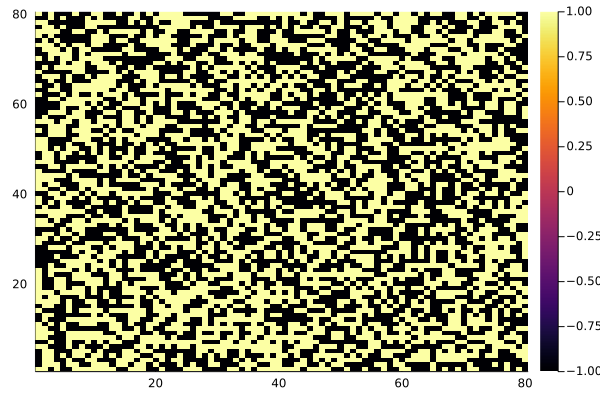

In [25]:
A = rand((-1,1),L,L)
heatmap(A)

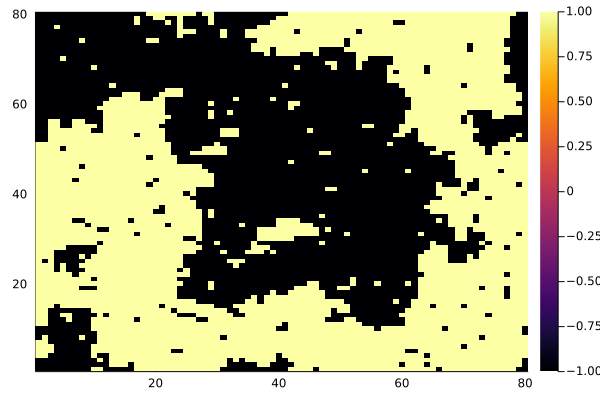

In [26]:
for i in 1:100
    MCS(A,L,1,L^2)
end
heatmap(A)